In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_swiss_roll

x, t = make_swiss_roll(n_samples=1000, noise=0.3, random_state=42)

In [10]:
x[:10], t[:10]

(array([[ -3.38456943,   4.44908106,   7.73254782],
        [  5.8770394 ,  11.49680415,  12.97740842],
        [  6.63786734,  18.07137473, -10.03114114],
        [ -6.08150467,  15.53711134,  -8.30912205],
        [  6.42579733,  16.14705978,  -0.42727581],
        [  5.9104011 ,  13.83546335,  -0.58389083],
        [  3.18548919,  14.63615421,  -4.52512295],
        [ 12.18264162,  18.11038972,   3.53245424],
        [ -6.01774278,   4.9388594 ,  -8.38958927],
        [  4.10713503,  10.30363038, -10.7568276 ]]),
 array([ 8.24234644, 13.67266022, 11.61126935, 10.35461227,  6.18283002,
         6.1826027 ,  5.25981413, 12.87590683, 10.37776449, 11.38581581]))

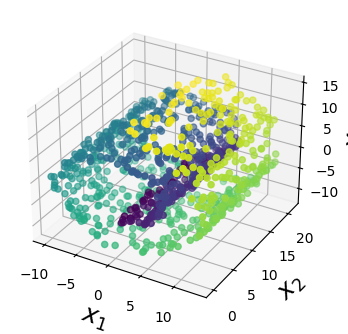

In [4]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=t)

ax.set_xlabel('$x_1$', fontsize=18)
ax.set_ylabel('$x_2$', fontsize=18)
ax.set_zlabel('$x_3$', fontsize=18)

plt.show()

# KernelPCA

In [5]:
from sklearn.decomposition import KernelPCA

poly_pca = KernelPCA(
  n_components=2,
  kernel='poly',
  gamma=0.01,
  coef0=1,
  fit_inverse_transform=True
)

z_poly = poly_pca.fit_transform(x)

## Reduction

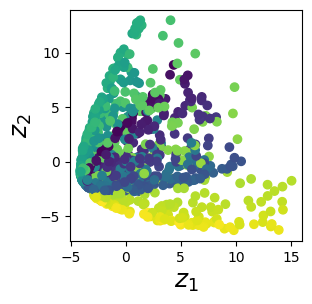

In [7]:
plt.figure(figsize=(3, 3))
plt.scatter(z_poly[:, 0], z_poly[:, 1], c=t)
plt.xlabel('$z_1$', fontsize=18)
plt.ylabel('$z_2$', fontsize=18)
plt.show()

## Reconstruction (Pre-Image)

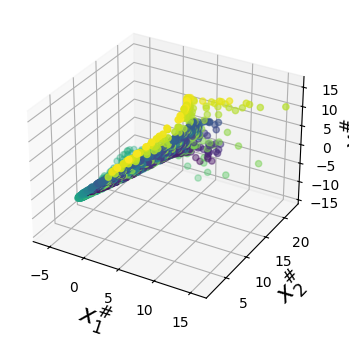

In [9]:
xp_poly = poly_pca.inverse_transform(z_poly)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xp_poly[:, 0], xp_poly[:, 1], xp_poly[:, 2], c=t)
ax.set_xlabel(r'$x_1^\#$', fontsize=18)
ax.set_ylabel(r'$x_2^\#$', fontsize=18)
ax.set_zlabel(r'$x_3^\#$', fontsize=18)
plt.show()

## Selecting a Kernel & Tuning Hyperparameters

### Grid Search

In [11]:
y = t > 7

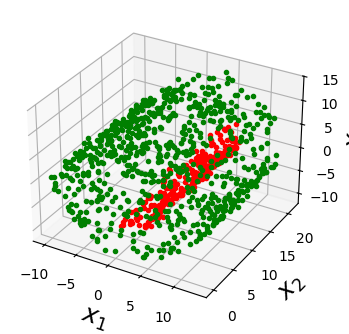

In [12]:
plt.figure(figsize=(4, 4))

ax = plt.subplot(111, projection='3d')

ax.plot(x[y==0, 0], x[y==0, 1], x[y==0, 2], 'r.')
ax.plot(x[y==1, 0], x[y==1, 1], x[y==1, 2], 'g.')

ax.set_xlabel('$x_1$', fontsize=18)
ax.set_ylabel('$x_2$', fontsize=18)
ax.set_zlabel('$x_3$', fontsize=18)

plt.show()

### Supervised Method

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [15]:
clf = Pipeline([
  ('kpca', KernelPCA(n_components=2, fit_inverse_transform=True)),
  ('log_reg', LogisticRegression())
])

param_grid = [{
  'kpca__gamma': np.linspace(0.01, 0.06, 11),
  'kpca__kernel': ['poly', 'rbf', 'sigmoid']
}]

In [18]:
grid_search = GridSearchCV(clf, param_grid, scoring='accuracy', cv=3)

grid_search.fit(x, y)

grid_search.best_params_

{'kpca__gamma': 0.039999999999999994, 'kpca__kernel': 'rbf'}

In [20]:
grid_search.best_score_

0.9220058381735029

In [21]:
best_pca = grid_search.best_estimator_['kpca']

In [22]:
z = best_pca.transform(x)
z

array([[-0.20209068, -0.05261846],
       [-0.12023297, -0.08971333],
       [ 0.06157507, -0.06158597],
       ...,
       [-0.03503649,  0.49826784],
       [-0.09862105, -0.00160218],
       [-0.18347857, -0.04695265]])

## Reconstruction Pre-Image Error

### Pre-Image

In [23]:
xp = best_pca.inverse_transform(z)

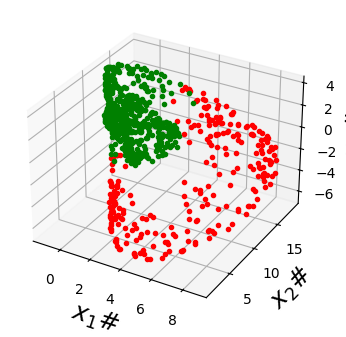

In [26]:
plt.figure(figsize=(4, 4))
ax = plt.subplot(111, projection='3d')
ax.plot(xp[y==0, 0], xp[y==0, 1], xp[y==0, 2], 'r.')
ax.plot(xp[y==1, 0], xp[y==1, 1], xp[y==1, 2], 'g.')
ax.set_xlabel(r'$x_1\#$', fontsize=18)
ax.set_ylabel(r'$x_2\#$', fontsize=18)
ax.set_zlabel(r'$x_3\#$', fontsize=18)
plt.show()


In [27]:
from sklearn.metrics import mean_squared_error

mean_squared_error(x, xp)

31.92776080605799